## @author - Pardeep

## Using pretrained model (ResNet50) to classify a dog
- Keras Applications provided deep learning models with pre-trained weights
- Documentation: https://keras.io/applications/

### # import necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

### importing Data

In [2]:
df_labels = pd.read_csv(r"C:\Users\parde\Downloads\Assignment\labels.csv")
df_labels['id'] = df_labels['id'] + '.jpg'
df_labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


In [3]:
df_labels['breed'].unique().shape[0]

120

In [4]:
df=df_labels.loc[df_labels.breed=='beagle']

In [5]:
df=df.append(df_labels.loc[df_labels.breed=='chihuahua'])

In [6]:
df=df.append(df_labels.loc[df_labels.breed=='doberman'])

In [7]:
df=df.append(df_labels.loc[df_labels.breed=='french_bulldog'])

In [8]:
df=df.append(df_labels.loc[df_labels.breed=='golden_retriever'])

In [9]:
df=df.append(df_labels.loc[df_labels.breed=='malamute'])

In [10]:
df=df.append(df_labels.loc[df_labels.breed=='pug'])

In [11]:
df=df.append(df_labels.loc[df_labels.breed=='saint_bernard'])

In [12]:
df=df.append(df_labels.loc[df_labels.breed=='scottish_deerhound'])

In [13]:
df=df.append(df_labels.loc[df_labels.breed=='tibetan_mastiff'])

In [14]:
df.shape

(841, 2)

# Data Preprocessing

In [15]:
from sklearn.model_selection import train_test_split
df_train, df_validation = train_test_split(df, test_size=0.2, shuffle=True)

In [16]:
df_train.shape , df_validation.shape

((672, 2), (169, 2))

### Preprocessing the Training set

## 1 Data Agumentation
Apply Only On train Data Only

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split=0.2)

training_set = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory='C:/Users/parde/Downloads/Assignment/train',
    x_col="id",
    y_col="breed",
    target_size=(224, 224),
    class_mode="categorical",
    subset="training",
    batch_size=32
)


Found 538 validated image filenames belonging to 10 classes.


### Preprocessing the val set

In [18]:
validation_set = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory='C:/Users/parde/Downloads/Assignment/train',
    x_col="id",
    y_col="breed",
    target_size=(224, 224),
    class_mode="categorical",
    subset="validation",
    batch_size=32
)

Found 134 validated image filenames belonging to 10 classes.


## ResNet50

- ResNet-50 is a convolutional neural network that is trained on more than a million images from the ImageNet database. 

- The network is 50 layers deep and can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

In [19]:
# import necessary library
from keras.models import Sequential
from keras.layers import *

# Importing transfer learning model

### Load ResNet50 with imagenet weights
### image size can be calibrated with target_size parameter
### ResNet50 excepts the input with a size 224x224

In [20]:
model = tf.keras.applications.ResNet50V2(input_shape=[224,224,3], weights='imagenet', include_top=False)

# preprocessing pre trained model

In [21]:
for layer in model.layers:
    layer.trainable = False

## adding layer for flattening the outputs from previous layers

In [22]:
x = Flatten()(model.output)

## adding layer for classification

In [23]:
prediction = Dense(10, activation='softmax')(x)

In [24]:
from tensorflow.keras.models import Model

In [25]:
# create a model object
model = Model(inputs=model.input, outputs=prediction)

# Training the transfer learning model

### Compiling the CNN

In [26]:
model.compile(optimizer = 'adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

### To avoid model to overfitting we have to stop the training at certain level, So we have to introduce early stoping which stops the training when change in desired value stop incearsing after specified epochs

In [27]:
from keras.callbacks import EarlyStopping

In [28]:
earlystop = EarlyStopping(monitor='accuracy', patience=3, verbose=2, restore_best_weights=True)

### Training the CNN on the Training set and evaluating it on the Test set

In [29]:
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size


In [30]:
a= model.fit(training_set, steps_per_epoch=STEP_SIZE_TRAIN, validation_data = validation_set, validation_steps=STEP_SIZE_VALID, callbacks= earlystop,epochs = 30)

Epoch 1/30
16/16 [==============================] - 30s 2s/step - loss: 4.0455 - accuracy: 0.5801 - val_loss: 1.5682 - val_accuracy: 0.8984
Epoch 2/30
16/16 [==============================] - 26s 2s/step - loss: 1.8038 - accuracy: 0.9090 - val_loss: 0.9057 - val_accuracy: 0.9219
Epoch 3/30
16/16 [==============================] - 26s 2s/step - loss: 0.8019 - accuracy: 0.9648 - val_loss: 1.4996 - val_accuracy: 0.9297
Epoch 4/30
16/16 [==============================] - 26s 2s/step - loss: 0.3135 - accuracy: 0.9753 - val_loss: 2.2974 - val_accuracy: 0.8750
Epoch 5/30
16/16 [==============================] - 26s 2s/step - loss: 0.5796 - accuracy: 0.9709 - val_loss: 1.1679 - val_accuracy: 0.9297
Epoch 6/30
16/16 [==============================] - 26s 2s/step - loss: 0.1160 - accuracy: 0.9764 - val_loss: 1.8712 - val_accuracy: 0.9062
Epoch 7/30
16/16 [==============================] - 26s 2s/step - loss: 0.7275 - accuracy: 0.9720 - val_loss: 1.6165 - val_accuracy: 0.8984
Epoch 8/30
16/16 [==

# Evaluating model on valdidation data on different evaluation metrix

In [32]:
val_loss, val_acc =model.evaluate(validation_set,steps=STEP_SIZE_VALID)
print("Val accuracy: ",val_acc*100)

4/4 [==============================] - 5s 1s/step - loss: 1.4736 - accuracy: 0.9219
Val accuracy:  92.1875


In [33]:
print("Val loss: ",val_loss)

Val loss:  1.473609447479248


In [34]:
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
import itertools

In [38]:
Y_pred = model.predict(validation_set)
y_pred = np.argmax(Y_pred, axis=1)

In [39]:
f_score = f1_score(validation_set.classes,y_pred,average='macro')
print('F1 score:',f_score)

F1 score: 0.09016804982322224


In [40]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    
    plt.figure(figsize=(25,25))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
target_names = []
for key in training_set.class_indices:
    target_names.append(key)

In [42]:
Y_pred = model.predict(validation_set)
y_pred = np.argmax(Y_pred, axis=1)

In [43]:
cm = confusion_matrix(validation_set.classes,y_pred)

Normalized confusion matrix


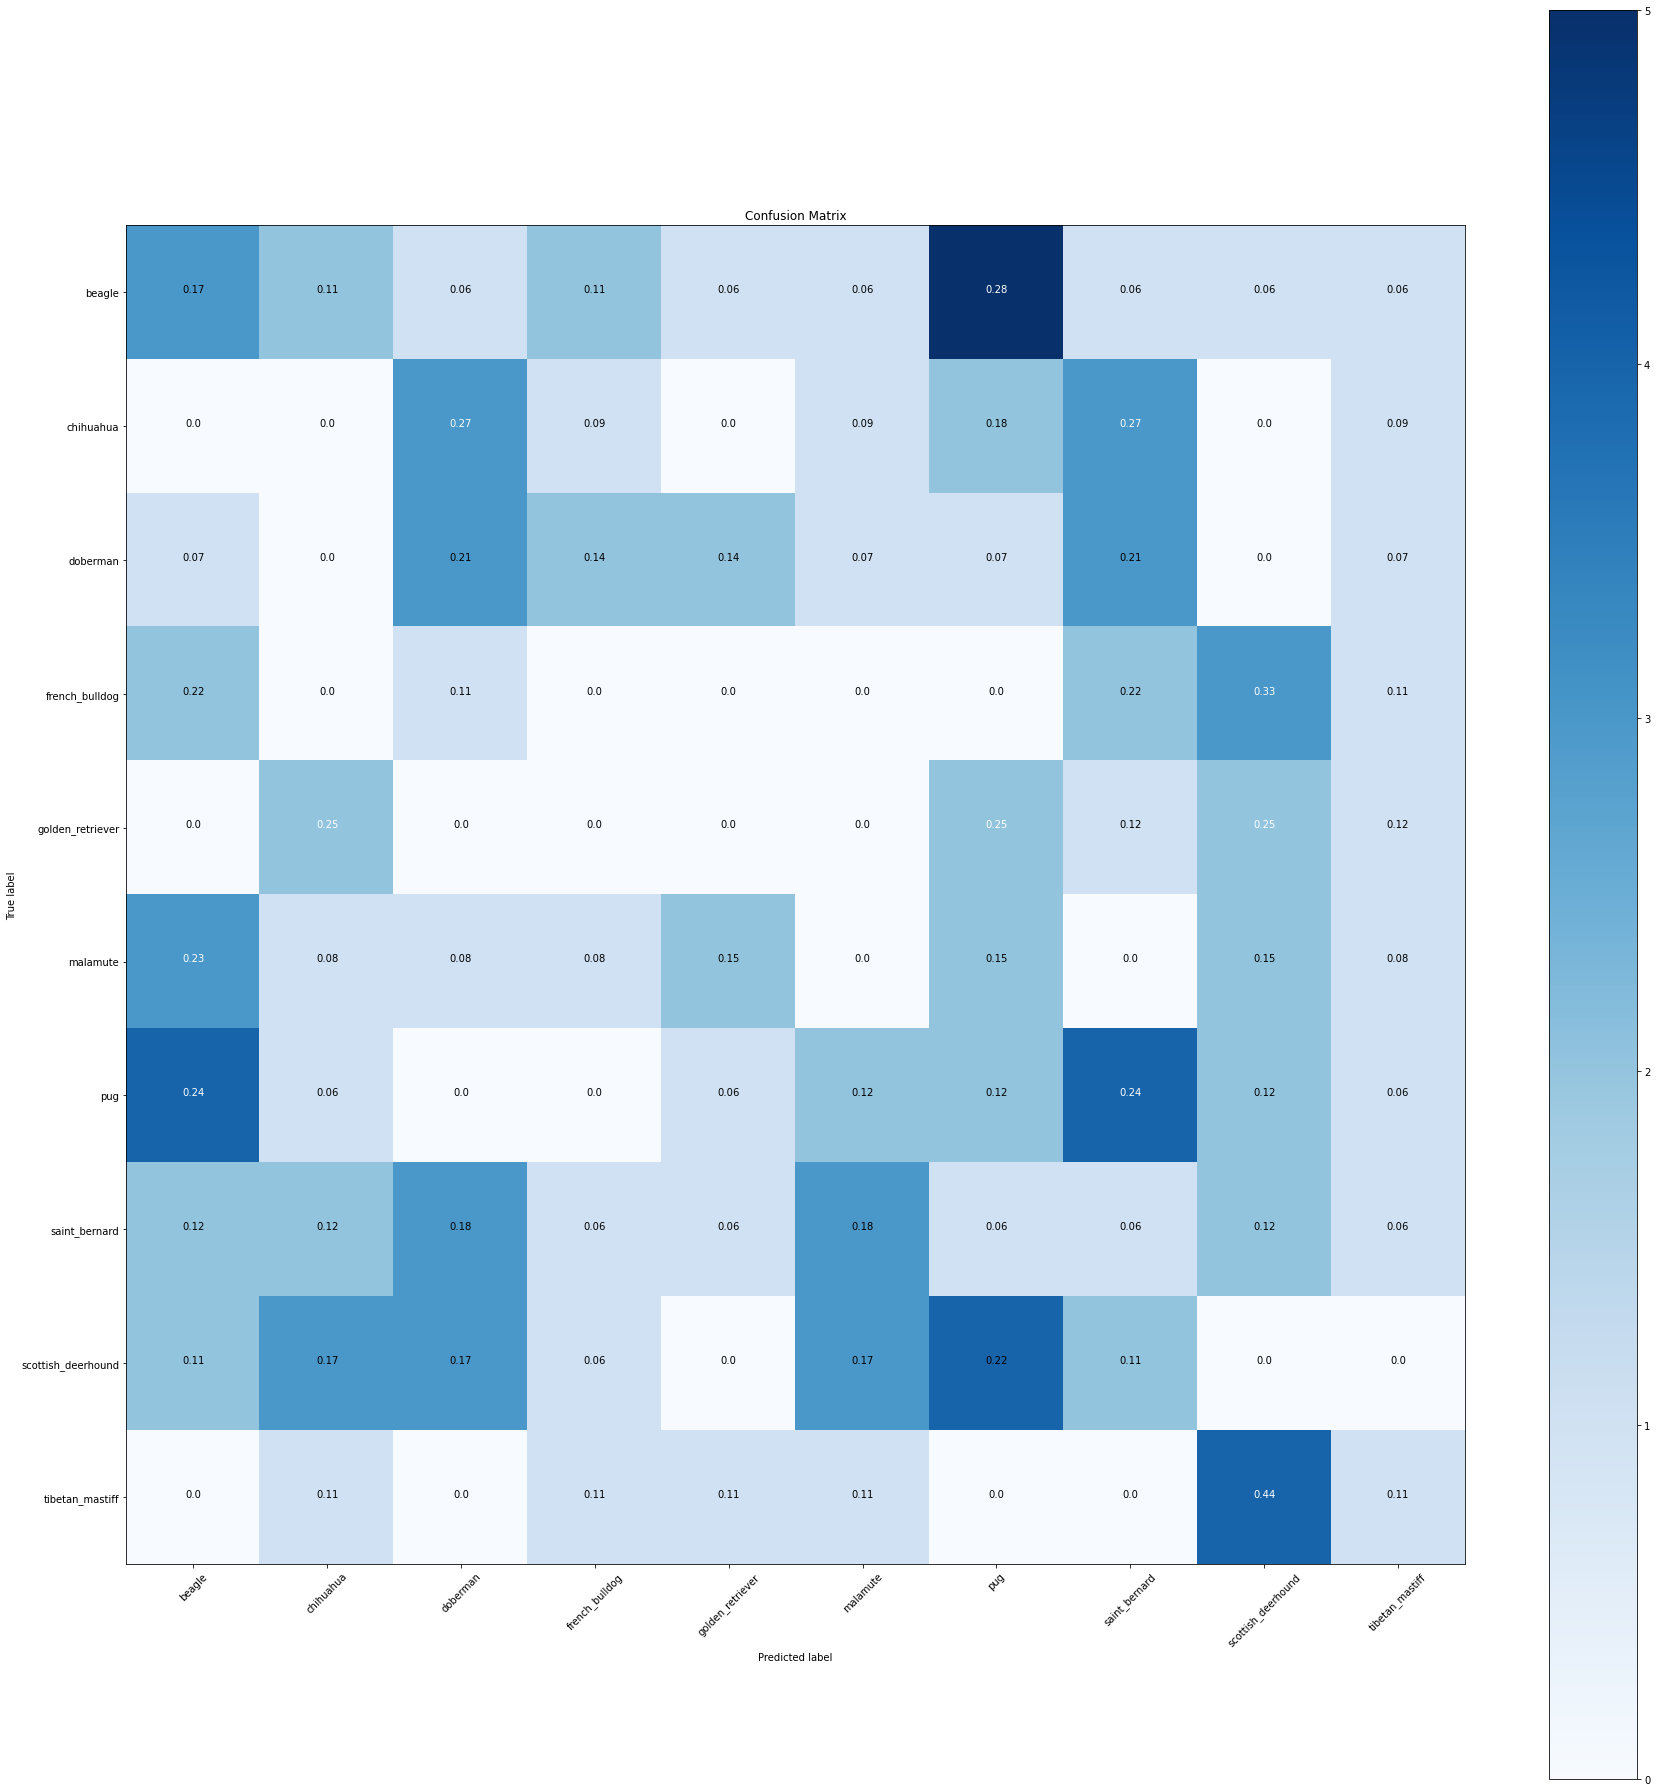

In [44]:
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

# Visualizing The History Of training

In [45]:
import matplotlib.pyplot as plt

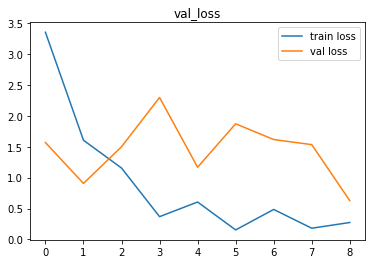

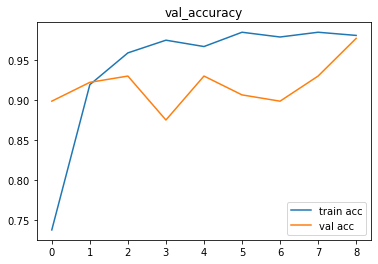

In [46]:

# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.title('val_loss') 
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.title('val_accuracy') 
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

### saving the tarined model

In [47]:
import tensorflow as tf

from keras.models import load_model

model.save('C:/Users/parde/Downloads/Assignment/resnet50v2/10classresnet50v2.h5')

### Preprocessing the test set

In [48]:
test_gen = ImageDataGenerator(rescale = 1./255)

test_data = test_gen.flow_from_dataframe(
    dataframe=df_validation,
    directory='C:/Users/parde/Downloads/Assignment/train',
    x_col="id",
    y_col="breed",
    target_size=(224, 224),
    class_mode=None,
    batch_size=32
)

Found 169 validated image filenames.


### Making Predictions on Test set

In [55]:
preds = model.predict(test_data)

In [56]:
predicted_class_indices=np.argmax(preds,axis=1)

In [57]:
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [58]:
filenames=test_data.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

In [59]:
fav_dogs = pd.read_csv("results.csv")
fav_dogs.head()

,Filename,Predictions
0,c2ae87dae29b344f92d82983d521d5d5.jpg,pug
1,1ad9c8713583e136c1c9884a26a8de10.jpg,scottish_deerhound
2,9f59f466dec517cbec6a32a201891156.jpg,beagle
3,13c630fcf8aa68ab0e97cd4a644b8943.jpg,pug
4,22c44ed27b40a8dc151ae65961c59fe8.jpg,chihuahua
